# Working with structured data in Python using Pandas


## Table of Contents

1. [Introduction](#introduction)<br>
2. [Series and DataFrames](#series)<br>
3. [Cleaning Data](#cleaning)<br>
4. [Selecting Data](#selection)<br>
5. [Merging Data](#merging)<br>
6. [Grouping Data](#grouping)<br>
7. [Visualising Data](#visualise)<br>

<a id="introduction"></a>
## 1. Introduction

A lot of data is **structured data**, which is data that is organized and formatted so it is easily readable, for example a table with variables as columns and records as rows, or key-value pairs in a noSQL database. As long as the data is formatted consistently and has multiple records with numbers, text and dates, you can probably read the data with [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), an open-source Python package providing high-performance data manipulation and analysis.

### Data

The data that you will explore in this notebook is about the boroughs in London. Within Greater London there are [32 boroughs](https://en.wikipedia.org/wiki/London_boroughs). You can download the data from [data.gov.uk](https://data.gov.uk/dataset/248f5f04-23cf-4470-9216-0d0be9b877a8/london-borough-profiles-and-atlas) where this description is given:

> The London Borough Profiles help paint a general picture of an area by presenting a range of headline indicator data to help show statistics covering demographic, economic, social and environmental datasets for each borough, alongside relevant comparator areas.



In [10]:
import numpy as np
import pandas as pd

** Read data from a CSV file using the `read_csv` function. Load a file by running the next cell:**

This file is read directly from a URL: https://github.com/sumonacalpoly/Datasets/blob/main/london-borough-profiles.csv

Use the following line

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/sumonacalpoly/Datasets/main/london-borough-profiles.csv", encoding='latin-1')
print("Number of rows, columns:", df.shape)

Number of rows, columns: (38, 84)


**Question-1: How many columns and Rows are there in the dataset?**

**Question-2: Display the first five and last five lines from the dataset.**






In [12]:
df.head(5)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3


In [13]:
df.tail(5)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We Only keep the data from the 32 boroughs by removng the last 5 rows from the DataFrame:

In [14]:
df = df.drop([33,34,35,36,37])
df.head(10)

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800.0,5326.0,290.0,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129.0,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000.0,78188.0,3611.0,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228.0,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600.0,151423.0,8675.0,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134.0,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300.0,97736.0,6058.0,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164.0,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100.0,121048.0,4323.0,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169.0,Lab,9.5,88.9,1.6,36.3
5,E09000006,Bromley,Outer London,327900.0,140602.0,15013.0,21.8,40.2,19.9,62.6,...,7.4,3.3,16.0,5.2,148.0,Cons,85.0,11.7,0.0,40.8
6,E09000007,Camden,Inner London,242500.0,107654.0,2179.0,111.3,36.4,17.3,71.0,...,7.1,3.6,21.3,3.9,164.0,Lab,22.2,74.1,1.9,38.7
7,E09000008,Croydon,Outer London,386500.0,159010.0,8650.0,44.7,37.0,22.0,64.9,...,7.2,3.3,24.5,6.5,178.0,Lab,42.9,57.1,0.0,38.6
8,E09000009,Ealing,Outer London,351600.0,132663.0,5554.0,63.3,36.2,21.4,66.8,...,7.3,3.6,23.8,6.9,164.0,Lab,17.4,76.8,5.8,41.2
9,E09000010,Enfield,Outer London,333000.0,130328.0,8083.0,41.2,36.3,22.8,64.4,...,7.3,2.6,25.2,7.0,152.0,Lab,34.9,65.1,0.0,38.2


<a id="cleaning"></a>
## 2. Cleaning Data

When exploring data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. Below are only a few examples of the endless possibilities. The best way to learn is to find a dataset and try to answer questions with the data.

First, let's make a copy of the Dataframe loaded from the URL:

In [15]:
boroughs = df.copy()


### Adding an index

Indexing and selecting data is key to data analysis and creating visualizations. For more information on indexing have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

**Q3: Set the area code (`Code`) as the index, which will change the table slightly and display few rows of the dataset.**

In [16]:
boroughs = boroughs.set_index("Code")

As not all columns are needed, let's remove some. If you are interested in any of these, change the code and do not remove the columns.

In [17]:
boroughs = boroughs.drop(columns=['GLA_Household_Estimate_2017',
       'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
       'Overseas_nationals_entering_the_UK_(NINo),_(2015/16)',
       'Largest_migrant_population_arrived_during_2015/16',
       'Second_largest_migrant_population_arrived_during_2015/16',
       'Third_largest_migrant_population_arrived_during_2015/16',
       'Male_employment_rate_(2015)',
       'Female_employment_rate_(2015)', 'Unemployment_rate_(2015)',
       'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)',
       'Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014)',
       'Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016)',
       '%_working-age_with_a_disability_(2015)',
       'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
       'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
       'Gross_Annual_Pay,_(2016)',
       'Modelled_Household_median_income_estimates_2012/13',
       '%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13)',
       'Number_of_jobs_by_workplace_(2014)',
       '%_of_employment_that_is_in_public_sector_(2014)', 'Jobs_Density,_2015',
       'Number_of_active_businesses,_2015',
       'Two-year_business_survival_rates_(started_in_2013)',
       'Crime_rates_per_thousand_population_2014/15',
       'Fires_per_thousand_population_(2014)',
       'Ambulance_incidents_per_hundred_population_(2014)',
       'Average_Band_D_Council_Tax_charge_(£),_2015/16',
       'New_Homes_(net)_2015/16_(provisional)',
       'Homes_Owned_outright,_(2014)_%',
       'Being_bought_with_mortgage_or_loan,_(2014)_%',
       'Rented_from_Local_Authority_or_Housing_Association,_(2014)_%',
       'Rented_from_Private_landlord,_(2014)_%',
       'Total_carbon_emissions_(2014)',
       'Household_Waste_Recycling_Rate,_2014/15',
       'Number_of_cars,_(2011_Census)',
       'Number_of_cars_per_household,_(2011_Census)',
       '%_of_adults_who_cycle_at_least_once_per_month,_2014/15',
       'Average_Public_Transport_Accessibility_score,_2014',
       'Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14',
       'Rates_of_Children_Looked_After_(2016)',
       '%_of_pupils_whose_first_language_is_not_English_(2015)',
       '%_children_living_in_out-of-work_households_(2015)',
       'Male_life_expectancy,_(2012-14)', 'Female_life_expectancy,_(2012-14)',
       'Teenage_conception_rate_(2014)',
       'Life_satisfaction_score_2011-14_(out_of_10)',
       'Worthwhileness_score_2011-14_(out_of_10)',
       'Anxiety_score_2011-14_(out_of_10)',
       'Childhood_Obesity_Prevalance_(%)_2015/16',
       'People_aged_17+_with_diabetes_(%)',
       'Mortality_rate_from_causes_considered_preventable_2012/14',
       'Proportion_of_seats_won_by_Conservatives_in_2014_election',
       'Proportion_of_seats_won_by_Labour_in_2014_election',
       'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'])

In [18]:
boroughs.columns

Index(['Area_name', 'Inner/_Outer_London', 'GLA_Population_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       'New_migrant_(NINo)_rates,_(2015/16)', 'Employment_rate_(%)_(2015)',
       'Gross_Annual_Pay_-_Male_(2016)', 'Gross_Annual_Pay_-_Female_(2016)',
       'Median_House_Price,_2015', '%_of_area_that_is_Greenspace,_2005',
       'Happiness_score_2011-14_(out_of_10)', 'Political_control_in_council',
       'Turnout_at_2014_local_elections'],
      dtype='object')

You can change names of columns using rename:

In [19]:
boroughs.rename(columns={'Area_name':'Name',
                'Inner/_Outer_London':'Inner/Outer',
                'GLA_Population_Estimate_2017':'Population',
                'Inland_Area_(Hectares)':'Area (ha)',
                'Average_Age,_2017':'Average Age',
                'Political_control_in_council':'Political control',
                'Population_density_(per_hectare)_2017':'Population density (/ha)',
                'New_migrant_(NINo)_rates,_(2015/16)':'New migrant rates',
                'Happiness_score_2011-14_(out_of_10)':'Happiness score',
                '%_of_resident_population_born_abroad_(2015)':'Population born abroad (%)',
                'Employment_rate_(%)_(2015)':'Employment rate (%)',
                'Turnout_at_2014_local_elections':'Turnout at local elections',
                'Median_House_Price,_2015':'Median House Price',
                "Largest_migrant_population_by_country_of_birth_(2011)":'Largest migrant population',
                'Gross_Annual_Pay_-_Female_(2016)':'Gross Pay (Female)',
                'Gross_Annual_Pay_-_Male_(2016)':'Gross Pay (Male)',
                '%_of_area_that_is_Greenspace,_2005':'Greenspace (%)'},
                 inplace=True)

In [20]:
boroughs.columns

Index(['Name', 'Inner/Outer', 'Population', 'Area (ha)',
       'Population density (/ha)', 'Average Age', 'Population born abroad (%)',
       'Largest migrant population', 'New migrant rates',
       'Employment rate (%)', 'Gross Pay (Male)', 'Gross Pay (Female)',
       'Median House Price', 'Greenspace (%)', 'Happiness score',
       'Political control', 'Turnout at local elections'],
      dtype='object')

In [21]:
boroughs.head()

,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800.0,290.0,30.3,43.2,NaN,United States,152.2,64.6,NaN,NaN,799999.0,4.8,6.0,NaN,NaN
E09000002,Barking and Dagenham,Outer London,209000.0,3611.0,57.9,32.9,37.8,Nigeria,59.1,65.8,30104.0,24602.0,243500.0,33.6,7.1,Lab,36.5
E09000003,Barnet,Outer London,389600.0,8675.0,44.9,37.3,35.2,India,53.1,68.5,36475.0,31235.0,445000.0,41.3,7.4,Cons,40.5
E09000004,Bexley,Outer London,244300.0,6058.0,40.3,39.0,16.1,Nigeria,14.4,75.1,37881.0,28924.0,275000.0,31.7,7.2,Cons,39.6
E09000005,Brent,Outer London,332100.0,4323.0,76.8,35.6,53.9,India,100.9,69.5,30129.0,29600.0,407250.0,21.9,7.2,Lab,36.3


In [22]:
boroughs.describe()

,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Turnout at local elections
count,33.000000,33.000000,33.000000,33.000000,32.000000,33.000000,33.000000,23.000000,29.000000,3.300000e+01,33.000000,33.000000,32.000000
mean,267739.393939,4764.030303,74.475758,36.375758,36.512500,55.330303,72.715152,36554.565217,31006.344828,4.654680e+05,31.412121,7.209091,38.840625
std,75383.345058,3270.856878,39.390751,2.487849,10.495614,29.414659,4.219384,4263.657103,3578.444148,2.043563e+05,12.673120,0.249203,3.529220
min,8800.000000,290.000000,21.800000,31.400000,10.900000,14.400000,64.600000,30104.000000,24006.000000,2.435000e+05,4.800000,6.000000,29.800000
25%,231200.000000,2681.000000,44.900000,35.000000,32.350000,37.600000,69.200000,34189.000000,29204.000000,3.450000e+05,23.200000,7.200000,36.875000
50%,276200.000000,3762.000000,59.200000,36.200000,36.900000,53.500000,73.100000,36475.000000,30173.000000,4.100000e+05,31.700000,7.200000,38.500000
75%,321000.000000,5642.000000,108.900000,37.700000,41.850000,66.200000,75.400000,38372.500000,32657.000000,4.850000e+05,38.200000,7.300000,40.725000
max,389600.000000,15013.000000,155.600000,43.200000,54.100000,152.200000,79.600000,46627.000000,39132.000000,1.200000e+06,59.300000,7.600000,47.200000


In [23]:
boroughs = boroughs.replace('.', float('NaN'))

**Note**: When reading data from CSV files or other sources, Pandas often infers the data type of columns. Sometimes, columns that should contain numbers might be assigned the 'object' data type (usually representing strings) if they contain any non-numeric values or formatting inconsistencies. This can hinder numerical analysis and operations. Therefore, `to_numeric` is used to explicitly convert such columns to the appropriate numeric type for further calculations.

In [24]:
boroughs['Population density (/ha)'] = pd.to_numeric(boroughs['Population density (/ha)'])
boroughs['Population born abroad (%)'] = pd.to_numeric(boroughs['Population born abroad (%)'])
boroughs['Gross Pay (Male)'] = pd.to_numeric(boroughs['Gross Pay (Male)'])
boroughs['Gross Pay (Female)'] = pd.to_numeric(boroughs['Gross Pay (Female)'])
boroughs['Median House Price'] = pd.to_numeric(boroughs['Median House Price'])
boroughs['Greenspace (%)'] = pd.to_numeric(boroughs['Greenspace (%)'])
boroughs['Turnout at local elections'] = pd.to_numeric(boroughs['Turnout at local elections'])

#boroughs['Area (ha)'] = boroughs['Area (ha)'].str.replace(',', '')
#boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])
boroughs['Area (ha)'] = boroughs['Area (ha)'].astype(str).str.replace(',', '')
boroughs['Area (ha)'] = pd.to_numeric(boroughs['Area (ha)'])


**Question-4: Check the data types of the dataset**

In [25]:
df.dtypes
# object = string

Code                                                          object
Area_name                                                     object
Inner/_Outer_London                                           object
GLA_Population_Estimate_2017                                 float64
GLA_Household_Estimate_2017                                  float64
                                                              ...   
Political_control_in_council                                  object
Proportion_of_seats_won_by_Conservatives_in_2014_election    float64
Proportion_of_seats_won_by_Labour_in_2014_election           float64
Proportion_of_seats_won_by_Lib_Dems_in_2014_election         float64
Turnout_at_2014_local_elections                              float64
Length: 84, dtype: object


**Q5: Using iloc, write the code to select all rows and the first two columns of the boroughs DataFrame. Explain in your own words what is the meaning of the code line that you wrote**

In [26]:
print(boroughs.iloc[:, :2].head())

#iloc = integer location - selects rows and columns by position, not label
# first : - selects all rows 
# second :2 - select columns starting fromm 0 up to (but not including 2)

                           Name   Inner/Outer
Code                                         
E09000001        City of London  Inner London
E09000002  Barking and Dagenham  Outer London
E09000003                Barnet  Outer London
E09000004                Bexley  Outer London
E09000005                 Brent  Outer London


**Q6: Find the boroughs where the average age of the population is greater than 35.**

In [27]:
boroughs[boroughs['Average Age'] > 35]


,Name,Inner/Outer,Population,Area (ha),Population density (/ha),Average Age,Population born abroad (%),Largest migrant population,New migrant rates,Employment rate (%),Gross Pay (Male),Gross Pay (Female),Median House Price,Greenspace (%),Happiness score,Political control,Turnout at local elections
Code,,,,,,,,,,,,,,,,,
E09000001,City of London,Inner London,8800.0,290.0,30.3,43.2,NaN,United States,152.2,64.6,NaN,NaN,799999.0,4.8,6.0,NaN,NaN
E09000003,Barnet,Outer London,389600.0,8675.0,44.9,37.3,35.2,India,53.1,68.5,36475.0,31235.0,445000.0,41.3,7.4,Cons,40.5
E09000004,Bexley,Outer London,244300.0,6058.0,40.3,39.0,16.1,Nigeria,14.4,75.1,37881.0,28924.0,275000.0,31.7,7.2,Cons,39.6
E09000005,Brent,Outer London,332100.0,4323.0,76.8,35.6,53.9,India,100.9,69.5,30129.0,29600.0,407250.0,21.9,7.2,Lab,36.3
E09000006,Bromley,Outer London,327900.0,15013.0,21.8,40.2,18.3,India,14.4,75.3,42026.0,32491.0,374975.0,57.8,7.4,Cons,40.8
E09000007,Camden,Inner London,242500.0,2179.0,111.3,36.4,41.4,United States,60.7,69.2,NaN,36632.0,700000.0,24.8,7.1,Lab,38.7
E09000008,Croydon,Outer London,386500.0,8650.0,44.7,37.0,29.4,India,32.3,75.4,35839.0,29819.0,300000.0,37.1,7.2,Lab,38.6
E09000009,Ealing,Outer London,351600.0,5554.0,63.3,36.2,47.4,India,65.2,72.7,32185.0,29875.0,430000.0,30.9,7.3,Lab,41.2
E09000010,Enfield,Outer London,333000.0,8083.0,41.2,36.3,35.0,Turkey,43.8,73.0,35252.0,30222.0,320000.0,45.6,7.3,Lab,38.2


**Which borough has the largest population density per hectare in 2017?**

In [28]:
popdensity = boroughs['Population density (/ha)']
max_density = popdensity.max()
boroughs[popdensity == max_density][['Name', 'Population density (/ha)']]


,Name,Population density (/ha)
Code,,
E09000019,Islington,155.6


**Q7: What are the maximum and minimum number of new migrants in 2015/2016? And for which boroughs?**

* Print a value with `print()`  

In [29]:
# new migrant rates already in 2015/2016 by dataset
print("Max new migrant rates:", boroughs["New migrant rates"].max())
print("Min new migrant rates:", boroughs["New migrant rates"].min())

Max new migrant rates: 152.2
Min new migrant rates: 14.4


**Q8: Which borough is happiest?**

* To extract an entire row use `idxmax()` which returns column with maximum value, and `.loc[]` to return row of the index




In [30]:
happiest = boroughs['Happiness score'].idxmax()
print(happiest)
boroughs.loc[happiest]

# 'Happiness score': This column contains the average happiness score (out of 10).

# .idxmax(): Finds the index (borough code) of the maximum happiness score.

# .loc[...]: Retrieves the entire row for that borough.


E09000020


Name                          Kensington and Chelsea
Inner/Outer                             Inner London
Population                                  159000.0
Area (ha)                                     1212.0
Population density (/ha)                       131.1
Average Age                                     39.3
Population born abroad (%)                      51.9
Largest migrant population             United States
New migrant rates                               66.2
Employment rate (%)                             68.2
Gross Pay (Male)                                 NaN
Gross Pay (Female)                               NaN
Median House Price                         1200000.0
Greenspace (%)                                  15.1
Happiness score                                  7.6
Political control                               Cons
Turnout at local elections                      29.8
Name: E09000020, dtype: object

<a id="merging"></a>
##   Merging Data

Pandas has several different options to combine or merge data. The [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) has lots of examples.

Let's create two new Dataframes to explore this: `cities` and `cities2`

In [31]:
data = {'city':       ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'population': [9787426,  2553379,     2440986,    1777934,1209143],
        'area':       [1737.9,   630.3,       598.9,      487.8,  368.5 ]}
cities = pd.DataFrame(data)
data2 = {'city':       ['Liverpool','Southampton'],
        'population': [864122,  855569],
        'area':       [199.6,   192.0]}
cities2 = pd.DataFrame(data2)


In [32]:
data = {'city': ['London','Manchester','Birmingham','Leeds','Glasgow'],
        'density': [5630,4051,4076,3645,3390]}
cities3 = pd.DataFrame(data)

In [33]:
cities

,city,population,area
0,London,9787426,1737.9
1,Manchester,2553379,630.3
2,Birmingham,2440986,598.9
3,Leeds,1777934,487.8
4,Glasgow,1209143,368.5


In [34]:
cities2

,city,population,area
0,Liverpool,864122,199.6
1,Southampton,855569,192.0


In [35]:
cities3

,city,density
0,London,5630
1,Manchester,4051
2,Birmingham,4076
3,Leeds,3645
4,Glasgow,3390


An extra column can be added with `.merge()` with an outer join using the city names:

In [36]:
cities = pd.merge(cities, cities3, how='outer', sort=True,on='city')
cities

,city,population,area,density
0,Birmingham,2440986,598.9,4076
1,Glasgow,1209143,368.5,3390
2,Leeds,1777934,487.8,3645
3,London,9787426,1737.9,5630
4,Manchester,2553379,630.3,4051


**Question-9:**

Which city has the highest population density, and how does it compare to the average population density of all the cities in the dataset? Interpret your result.

use the formula to calculate the population density:
`population density =
population / area`


In [37]:
maxpopdensidx = cities["density"].idxmax()
print("Highest Population Density:", cities.loc[maxpopdensidx]["city"])
print("Average Population Density:", cities["density"].mean())


Highest Population Density: London
Average Population Density: 4158.4


<a id="grouping"></a>
## Grouping Data - Explanation and Steps to help complete the tasks that follow

Grouping data is a quick way to calculate values for classes in your DataFrame.

In [38]:
# Add a 'region' column to the 'cities' DataFrame
cities['region'] = ['London', 'North West', 'West Midlands', 'Yorkshire and the Humber', 'Scotland']


# Group by 'region' and calculate total population for each region
grouped_by_region = cities.groupby('region')['population'].sum()


In [39]:
cities

,city,population,area,density,region
0,Birmingham,2440986,598.9,4076,London
1,Glasgow,1209143,368.5,3390,North West
2,Leeds,1777934,487.8,3645,West Midlands
3,London,9787426,1737.9,5630,Yorkshire and the Humber
4,Manchester,2553379,630.3,4051,Scotland


**Question-10:**
Determine which region has the highest total population. Additionally, rank the cities within each region by population in descending order. How does this ranking help in understanding population distribution across different regions?"


In [40]:
print("Highest total population region:", cities.loc[cities["population"].idxmax()]["region"])
print(cities.sort_values(by=["region", "population"], ascending=[True, False]))

Highest total population region: Yorkshire and the Humber
         city  population    area  density                    region
0  Birmingham     2440986   598.9     4076                    London
1     Glasgow     1209143   368.5     3390                North West
4  Manchester     2553379   630.3     4051                  Scotland
2       Leeds     1777934   487.8     3645             West Midlands
3      London     9787426  1737.9     5630  Yorkshire and the Humber


<a id="visualise"></a>
##  Visualising Data

Pandas uses [`Matplotlib`](https://matplotlib.org/users/index.html) as the default for visualisations.

Import the package and also add the magic line starting with `%` to output the charts within the notebook:

Use the following code as reference - it is suggested to first go over these examples and then answer the questions that follow

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
boroughs = boroughs.reset_index()

The default plot is a line chart that uses the index for the x-axis:

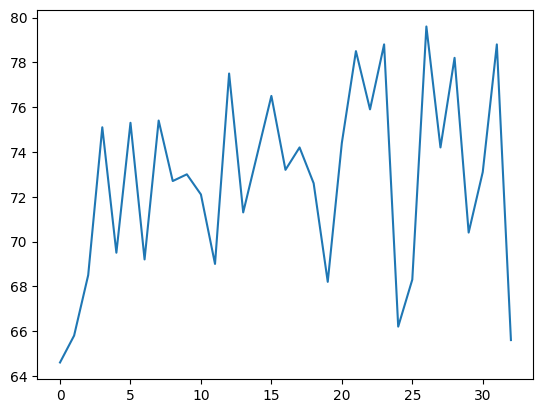

In [43]:
boroughs['Employment rate (%)'].plot();

To create a plot that makes more sense for this data have a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for all options.

For the above example, a histogram might work better. You can change the number of `bins` to get the desired output:

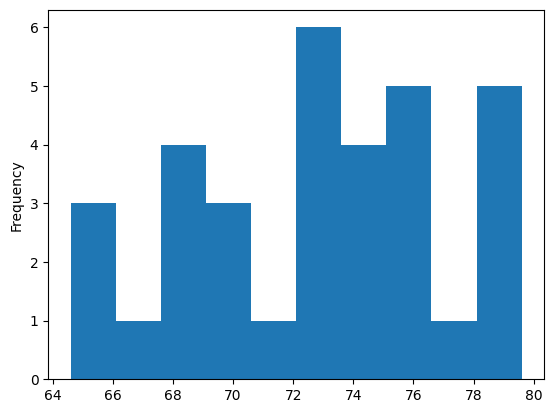

In [44]:
boroughs['Employment rate (%)'].plot.hist(bins=10);

Change the size of the histogram with the `figsize` option:

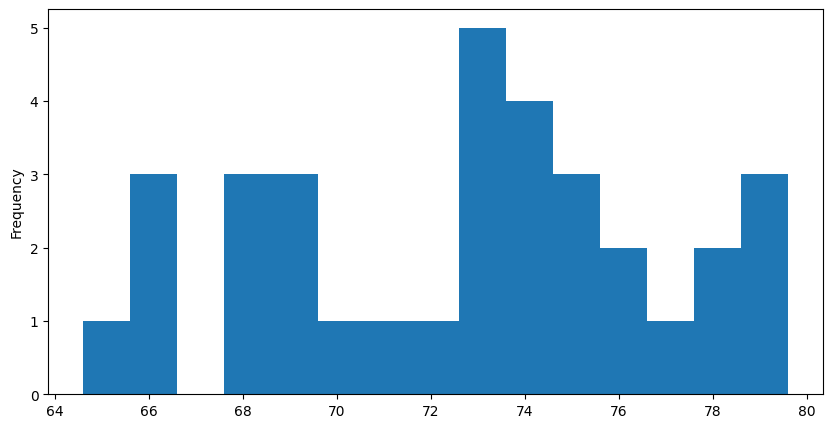

In [45]:
boroughs['Employment rate (%)'].plot.hist(bins=15,figsize=(10,5));

Within the plot command you can select the data directly. The below histogram shows the Employment rate for Outer London only:

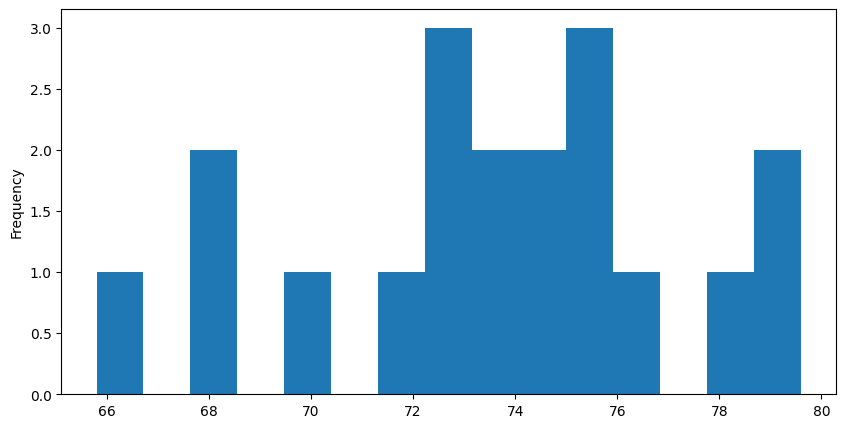

In [46]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));

To add the Employment rate for Inner London, repeat the plot command with a different selection of the data:

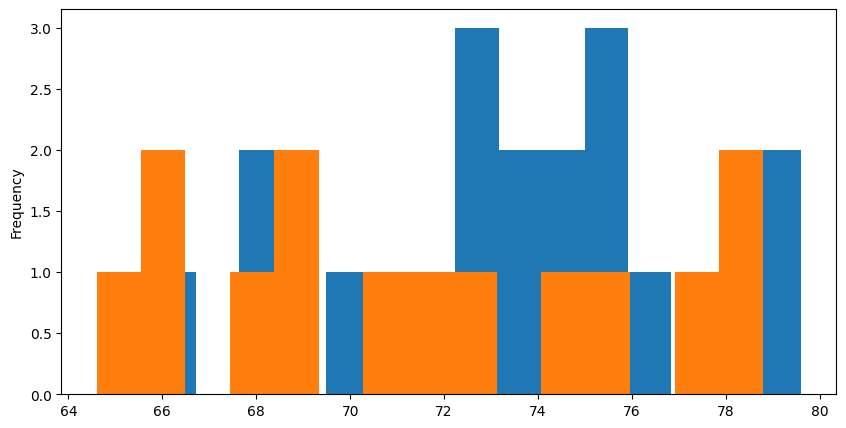

In [47]:
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(bins=15,figsize=(10,5));
boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(bins=15,figsize=(10,5));

The above plot is difficult to read as the histograms have overlapped. You can fix this by changing the colours and making them transparant.
    
To add a legend each histogram needs to be assigned to an object `ax`. With `legend()` you can then add a legend. With `plt.xlabel()` you can also add a label for the x-axis (this works similar for the y-axis):

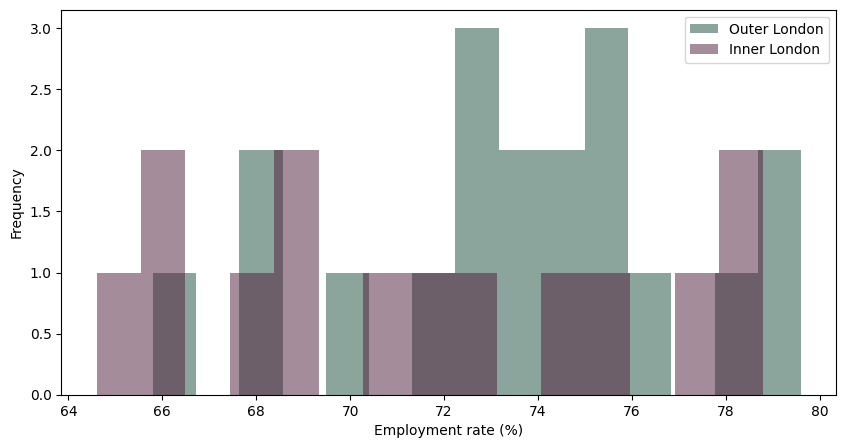

In [48]:
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Outer London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#1A4D3B');
ax = boroughs['Employment rate (%)'][boroughs['Inner/Outer']=='Inner London'].plot.hist(
    bins=15,figsize=(10,5),alpha=0.5,color='#4D1A39');
ax.legend(['Outer London','Inner London'])
plt.xlabel('Employment rate (%)');

There are various options available to change every aspect of your chart. Below are some examples to get you started.
        


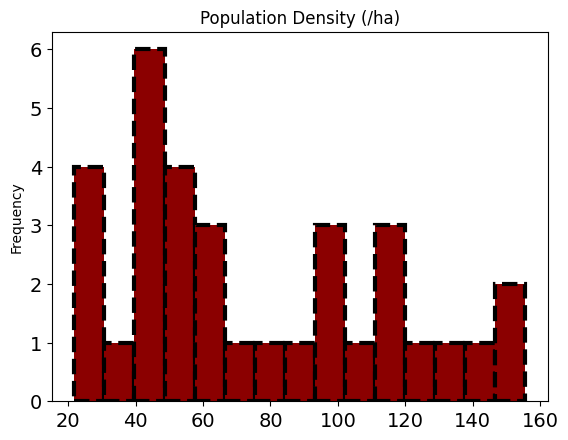

In [49]:
boroughs['Population density (/ha)'].plot.hist(
    bins=15,
    title="Population Density (/ha)",
    legend=False,
    fontsize=14,
    grid=False,
    linestyle='--',
    edgecolor='black',
    color='darkred',
    linewidth=3);

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It is an easy to use visualisation package that works well with Pandas DataFrames.

Below are a few examples using Seaborn.

Refer to this [documentation](https://seaborn.pydata.org/index.html) for information on lots of plots you can create.

In [50]:
import seaborn as sns

Let's look at a distribution plot using `distplot`, which shows a distribution of the data.

Use the `dropna()` function to remove rows and columns with Null/NaN values:

/tmp/ipykernel_71633/2662100469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boroughs['Population density (/ha)'].dropna());


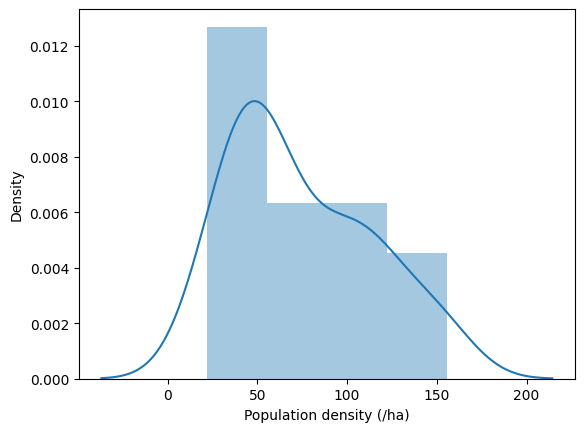

In [51]:
sns.distplot(boroughs['Population density (/ha)'].dropna());

<You can create categorical plots with `catplot`. There are categorical scatter plots, distribution plots and estimate plots. The `kind` parameter selects the function to use, for instance box, violin, swarm ,bar, stripplot and boxen.
    
The default representation in catplot() uses a scatter plot:

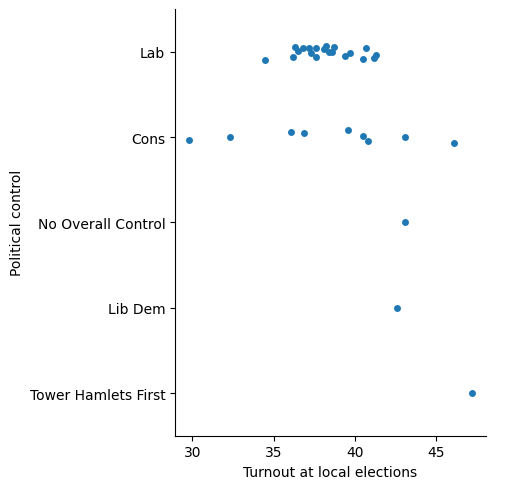

In [52]:
sns.catplot(x='Turnout at local elections', y='Political control', data=boroughs);

Also try `kind="swarm"`, `kind="box"` or `kind="violin"`:

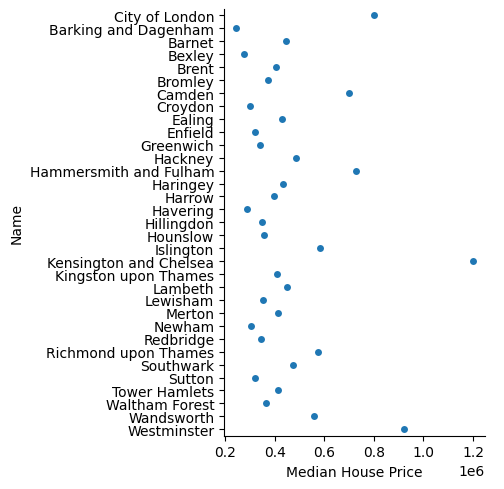

In [53]:
sns.catplot(x='Median House Price', y='Name', kind='swarm', data=boroughs);

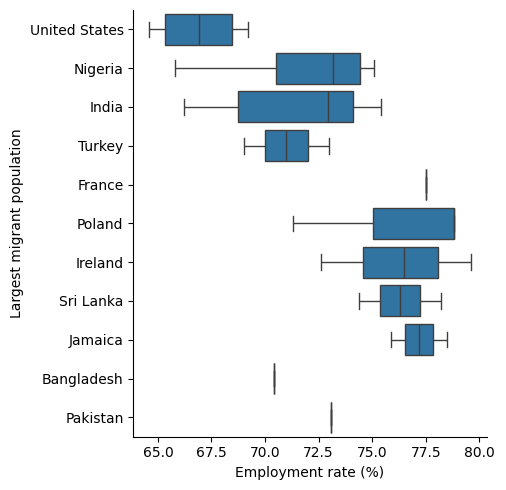

In [54]:
sns.catplot(x='Employment rate (%)', y='Largest migrant population', kind="box", data=boroughs);

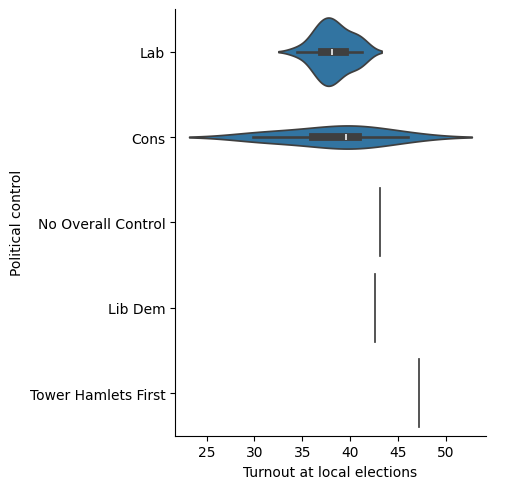

In [55]:
sns.catplot(x='Turnout at local elections', y='Political control', kind="violin", data=boroughs);



**Q11: Create two histograms that compare the Gross Annual pay for Male and Female Employees using `.plot.hist()`**

* To add two histograms to one plot you can repeat `.plot()` in the same cell
* Add a legend by assiging each histogram to an object `ax`, which is used to create a legend

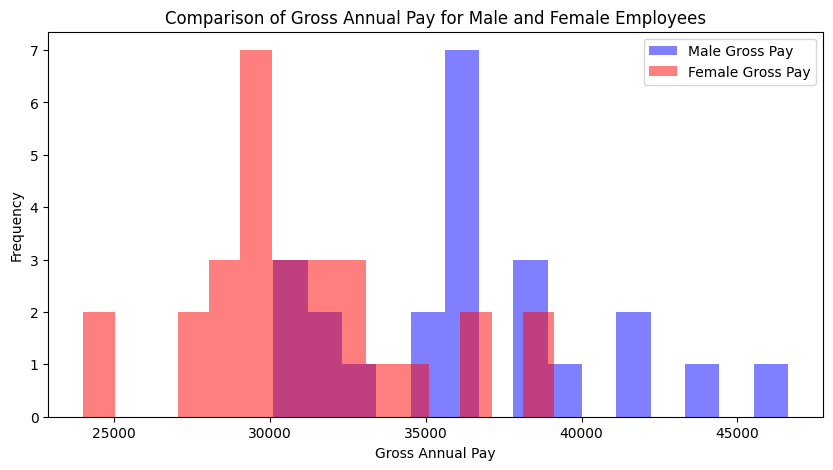

In [56]:
import matplotlib.pyplot as plt

# Create the first histogram for Male Gross Pay
ax = boroughs['Gross Pay (Male)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='blue')

# Create the second histogram for Female Gross Pay on the same plot
ax = boroughs['Gross Pay (Female)'].plot.hist(bins=15, figsize=(10, 5), alpha=0.5, color='red')

# Add a legend to differentiate the histograms
ax.legend(['Male Gross Pay', 'Female Gross Pay'])

# Add a title and labels for clarity
plt.title('Comparison of Gross Annual Pay for Male and Female Employees')
plt.xlabel('Gross Annual Pay')
plt.ylabel('Frequency')

# Display the plot
plt.show()

**Q12:Create a bar plot comparing the median house prices for different boroughs**

* To customise the size of your maps, use the example of `[fig, ax]`, which customises the figsize for each map in other examples above

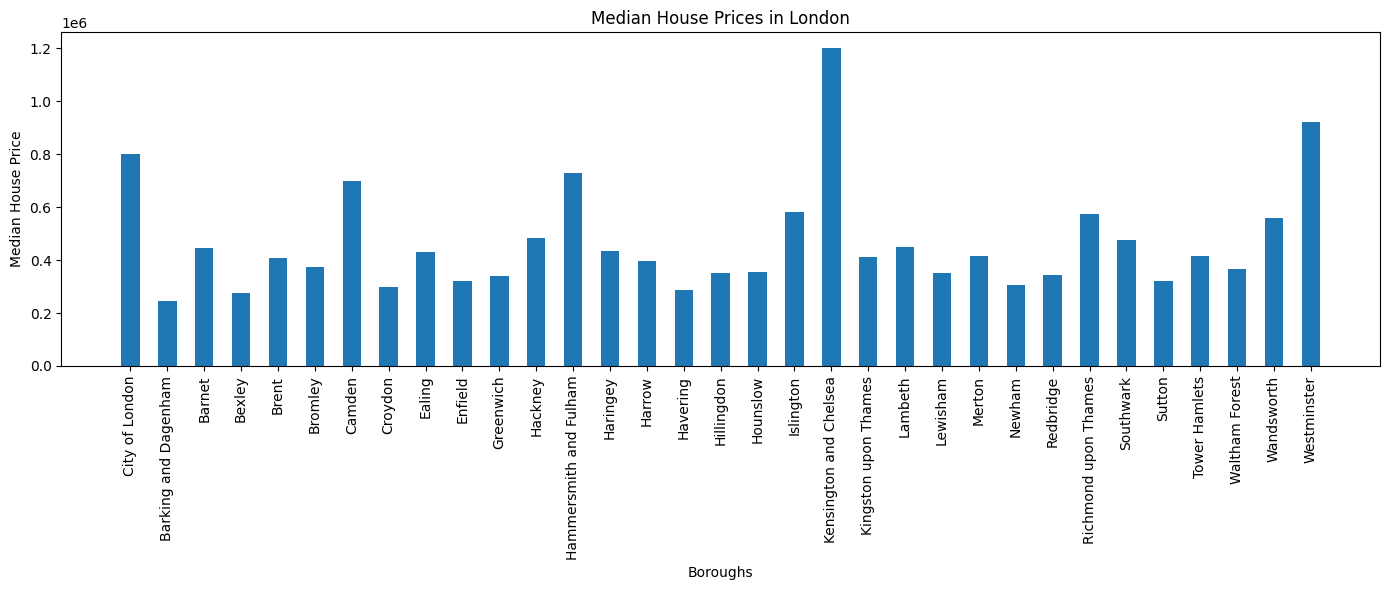

In [60]:

# Create figure and axis objects with a custom size
fig, ax = plt.subplots(figsize=(14, 6))  # You can adjust the size as needed

# Create the bar plot
ax.bar(boroughs["Name"], boroughs["Median House Price"], width=0.5)

# Set titles and labels
ax.set_title("Median House Prices in London")
ax.set_xlabel("Boroughs")
ax.set_ylabel("Median House Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Q13: Considering the observed trends in the London Boroughs dataset, how do economic indicators like employment rate and median house price correlate with social factors like happiness and greenspace percentage in Inner London compared to Outer London?**



-- Is there a significant difference in the correlation between employment rate and happiness score between Inner and Outer London boroughs?

-- Does the percentage of greenspace have a stronger influence on median house prices in Inner London compared to Outer London?print Inner London Correlation and Outer London Correlation values. Explain your Interpretation.

-- Are boroughs with higher employment rates in Inner London also associated with higher happiness scores despite potentially lower greenspace availability?


In [58]:
inner = boroughs[boroughs["Inner/Outer"] == "Inner London"]
outer = boroughs[boroughs["Inner/Outer"] == "Outer London"]

inner_happy_corr = inner["Employment rate (%)"].corr(inner["Happiness score"])
outer_happy_corr = outer["Employment rate (%)"].corr(outer["Happiness score"])
print("Inner Happy Corr:", inner_happy_corr)
print("outer_happy_corr", outer_happy_corr)


Inner Happy Corr: 0.4643234760911259
outer_happy_corr 0.04995759854803414


There is a signficiant difference in correlation between the inner and outer London boroughs.

In [59]:
inner_green_corr = inner["Greenspace (%)"].corr(inner["Median House Price"])
outer_green_corr = outer["Greenspace (%)"].corr(outer["Median House Price"])

print("inner_green_corr", inner_green_corr)
print("outer_green_corr", outer_green_corr)

inner_green_corr -0.09199414583591418
outer_green_corr 0.0706610279982677


There is a low correlation between the greenspace and median house prices for both inner and outer London boroughs. 

As the greenspace % increases, the median house price decreases in the inner London boroughs.

As the greenspace % increases, the median house price increases in the outer London boroughs.